# Rhythm Interpolation Methods 

In [1]:
import os
import sys
print(sys.version)

3.9.10 (main, Feb  9 2022, 11:11:48) 
[GCC 11.1.0]


In [2]:
import warnings

import joblib

import numpy as np
import matplotlib.pyplot as plt

In [3]:
sys.path.append('./COMMON_UTILS/')

In [4]:
from wasserstein_transformations import SmoothTransform

In [5]:
warnings.simplefilter("ignore")

### Wasserstein Transformation 

In [6]:
src, dst = joblib.load('./activations.pkl')

In [7]:
k = 300

ps, qs = src[0][:k], dst[0][:k]
ps, qs = ps/ps.sum(), qs/qs.sum()

In [12]:
sm = SmoothTransform(steps=5)

In [13]:
trans = sm.transform(ps, qs)

  0%|          | 0/5 [00:00<?, ?it/s]

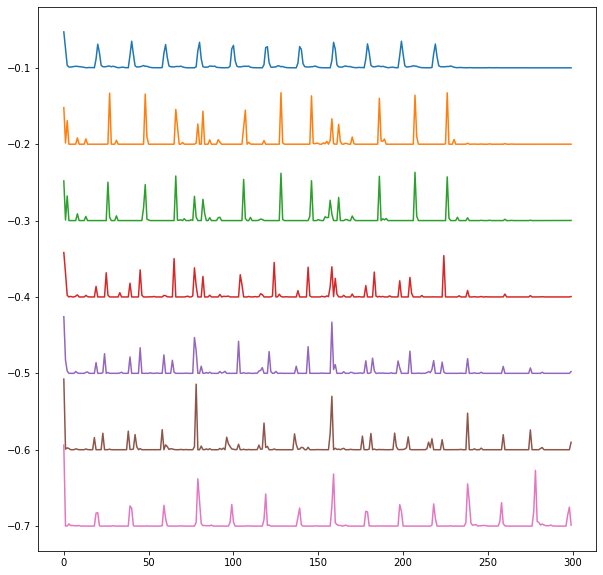

In [14]:
sm.plot_transform(trans, source=ps, target=qs)

In [15]:
trans.shape

(5, 300)

### Custom Mehtod 

In [63]:
v0 = np.zeros(12)
v0[1] = 0.5
v0[6] = 0.5

v1 = np.zeros(12)
v1[3] = 0.5
v1[9] = 0.5

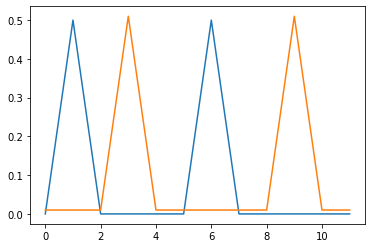

In [65]:
plt.plot(v0)
plt.plot(v1+0.01);

In [83]:
T = np.zeros((12, 12))
T[1, 3] = 0.5
T[6, 9] = 0.5

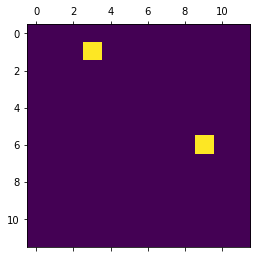

In [84]:
plt.matshow(T);

In [85]:
def interp(v0, v1, T, p):
    vp = np.zeros_like(v0)
    for i in range(len(vp)):
        js = np.where(T[i] > 0)[0]
        for j in js:
            j_p = int(p * j + (1-p)*i)
            vp[j_p] += T[i, j]
            
    return vp

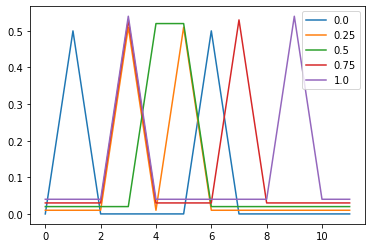

In [82]:
for i, p in enumerate(np.linspace(0, 1, 5)):
    plt.plot(interp(v0, v1, T, p)+0.01*i, label=p)
    
plt.legend()
plt.show()